# Multiple Linear Regression

## Importing the libraries

In [38]:
#!pip install -U scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [5]:
data = pd.read_csv('50_Startups.csv')
data=data.dropna() 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [27]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Checking Assumptions Of Linear Regression ##

# 1.Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Profit variable

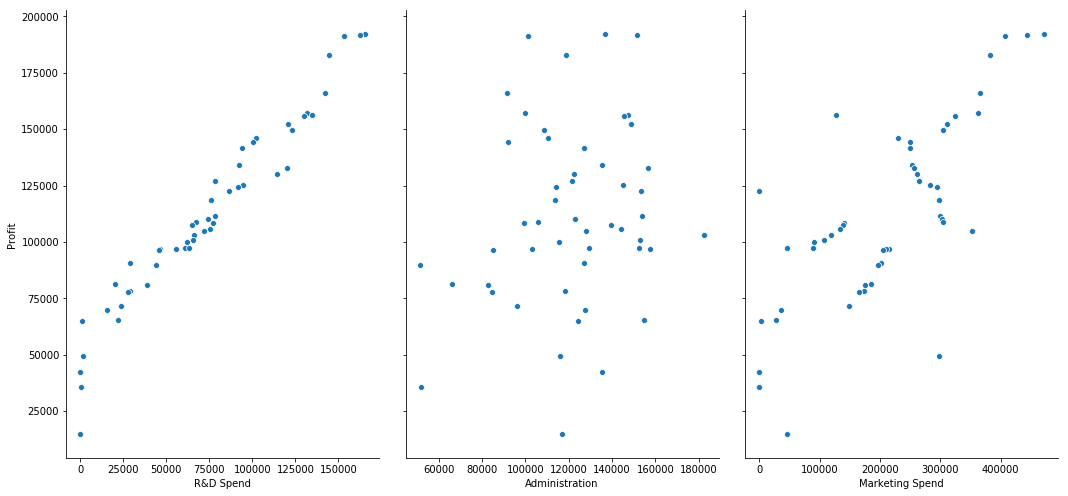

In [6]:
p = sns.pairplot(data, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit', size=7, aspect=0.7)

# By looking at the plots we can see that with the R&D Spend variable forms an accurately linear shape and somewhat marketing Spend but Administration seems to hardly have any specific shape and doesnt much impact target variable.

## EDA on Dataset -

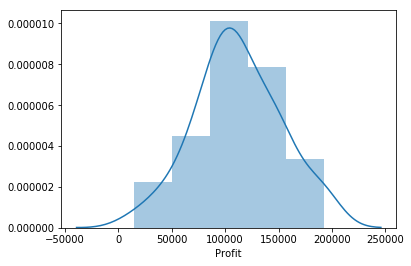

In [7]:
#Histgram on Profit
sns.distplot(data['Profit'],bins=5,kde=True)

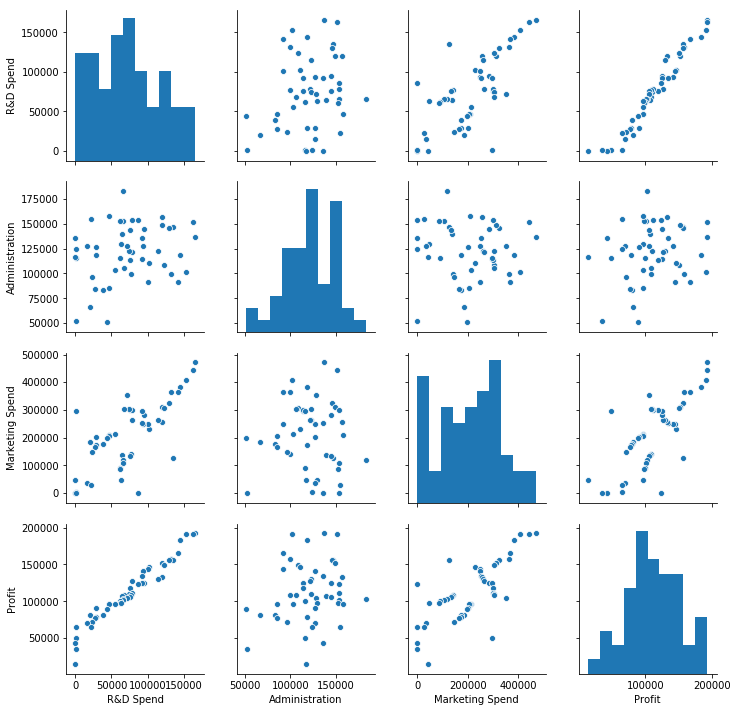

In [8]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(data)

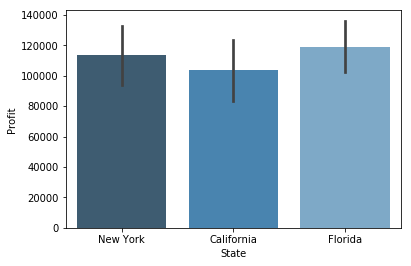

In [9]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=data, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

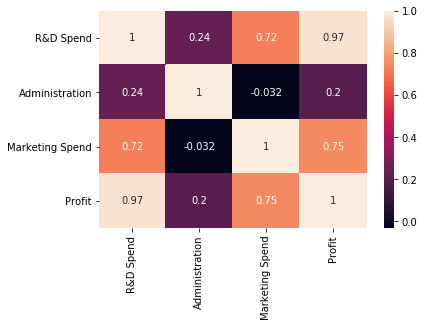

In [10]:
#gives positive & negative relation between categories
sns.heatmap(data.corr(), annot=True)

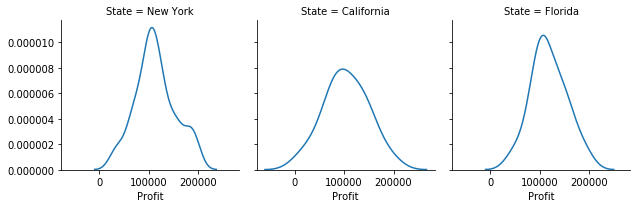

In [11]:
# spread of profit against state 
g=sns.FacetGrid(data, col='State')
g=g.map(sns.kdeplot,'Profit')

## Check Skewness

Skewness of R&D Spend: 0.164002172321177
Skewness of Administration: -0.4890248099671768
Skewness of Marketing Spend: -0.04647226758360412
Skewness of Profit: 0.023291019769116614


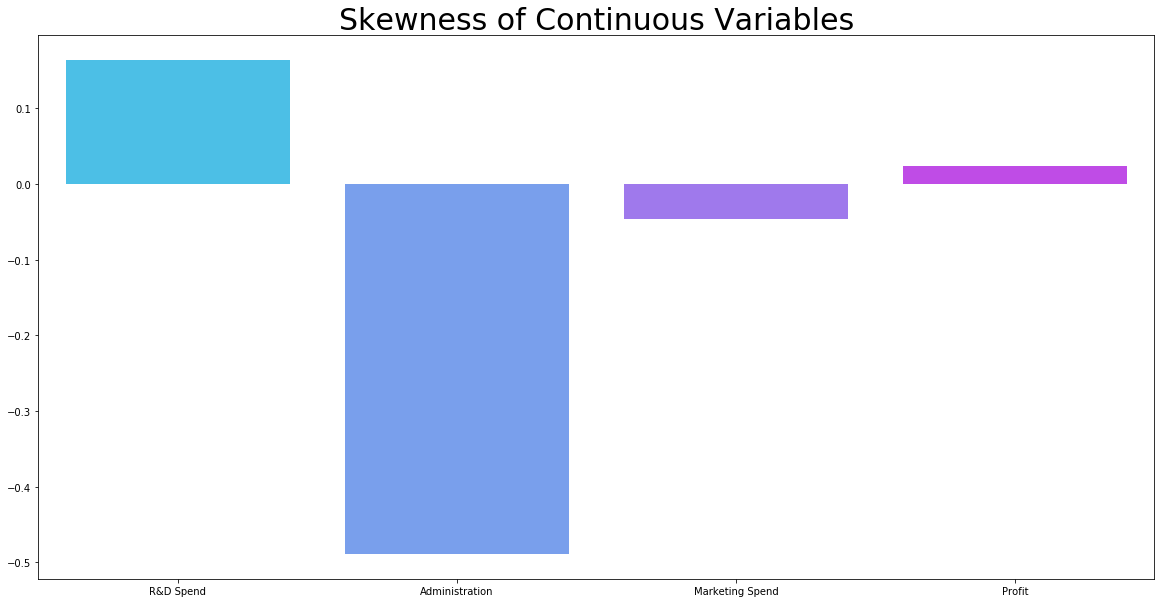

In [12]:
plt.figure(figsize=(20,10))
sk=dict()
for col in data.columns:
    if col!="State":
        skewness = data[col].skew()
        print(f"Skewness of {col}: {skewness}")
        sk[col]=skewness
sns.barplot(x=list(sk.keys()), y=list(sk.values()), palette="cool")
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

## Check Kurtosis ##

Kurtosis of R&D Spend: -0.7614645568424674
Kurtosis of Administration: 0.22507113536865386
Kurtosis of Marketing Spend: -0.6717011281297514
Kurtosis of Profit: -0.06385888546853113


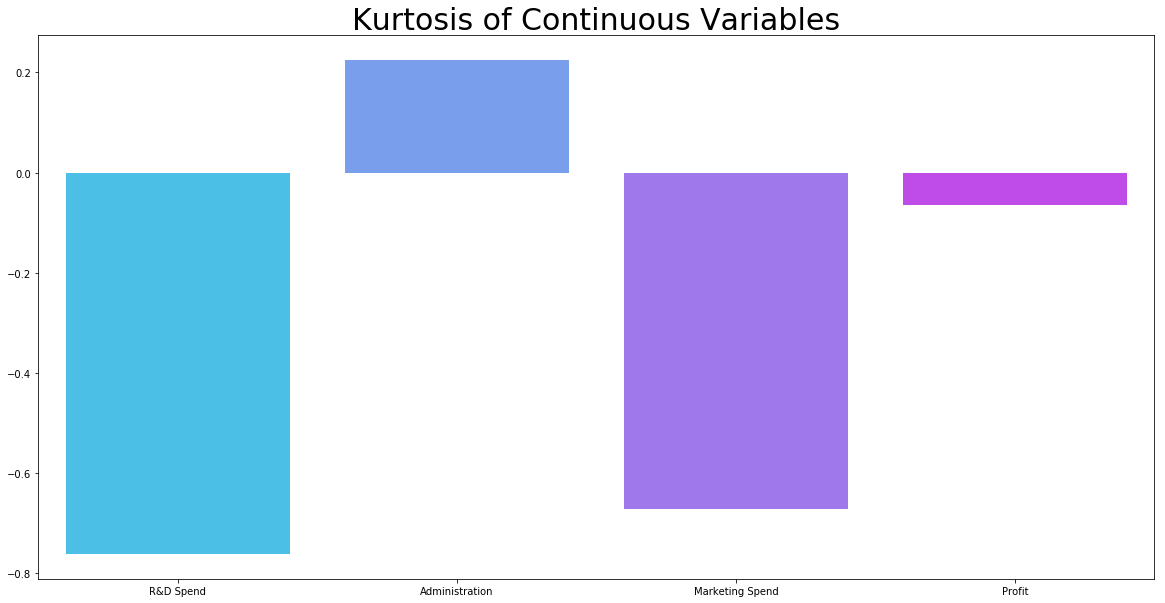

In [13]:
plt.figure(figsize=(20,10))
kr=dict()
for col in data.columns:
    if col!="State":
        kurtosis = data[col].kurt()
        print(f"Kurtosis of {col}: {kurtosis}")
        kr[col]=kurtosis
sns.barplot(x=list(kr.keys()), y=list(kr.values()), palette="cool")
plt.title("Kurtosis of Continuous Variables", fontsize=30)
plt.show()

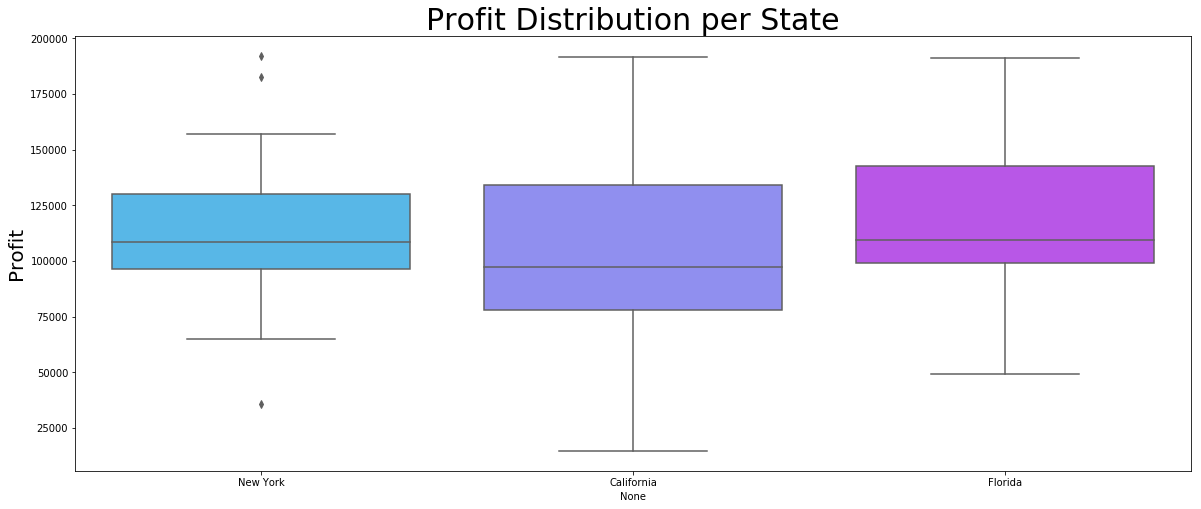

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(y="Profit", data=data, x="State", palette="cool")
plt.xlabel(None)
plt.ylabel("Profit",fontsize=20)
plt.title("Profit Distribution per State", fontsize=30)
plt.show()

## Encoding categorical data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [18]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [75]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_error: ', mean_squared_error(y_test,y_pred))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mean_absolute_percentage_error(y_test, y_pred),4))
    print('Adjusted r2: ', round(1 - (1-regressor.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [76]:
regression_results(y_test, y_pred)

explained_variance:  0.9469
mean_squared_error:  83502864.03259295
r2:  0.9347
MAE:  7514.2937
MAPE:  0.0645
Adjusted r2:  0.804
MSE:  83502864.0326
RMSE:  9137.9902


0.8041205419846909

0.06449754085356273

# 2.Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [95]:
residuals = y_test-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3952.0102448099497


In [96]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

# 3. Detecting heteroscedasticity!  Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.


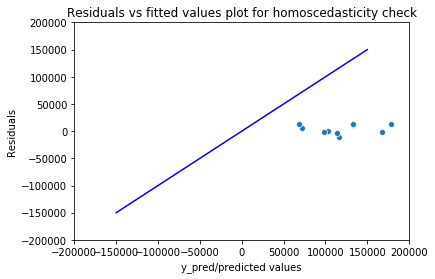

In [97]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-200000,200000)
plt.xlim(-200000,200000)
p = sns.lineplot([-150000,150000],[-150000,150000],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Goldfeld Quandt Test Checking heteroscedasticity : Using Bartlett Test we test for heteroscedasticity.  

# Null Hypothesis: Error terms are homoscedastic                                                      Alternative Hypothesis: Error terms are heteroscedastic.

In [98]:
from scipy.stats import bartlett
test = bartlett(X_train,residuals)
print(test)

BartlettResult(statistic=31.799949836822126, pvalue=1.708971574361713e-08)


# Since p value is quite less than 0.05 in Bartlett, it's null hypothesis that error terms are homoscedastic gets rejected, that's not good for a regression.

# 4. Check for Normality of error terms/residuals

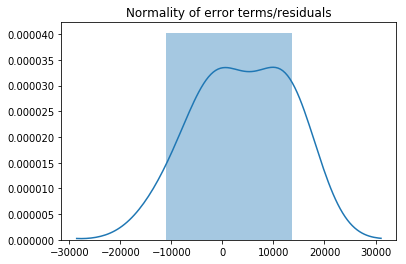

In [99]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# The residual terms are pretty much normally distributed for the number of test points we took

# 5. No perfect multicollinearity In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

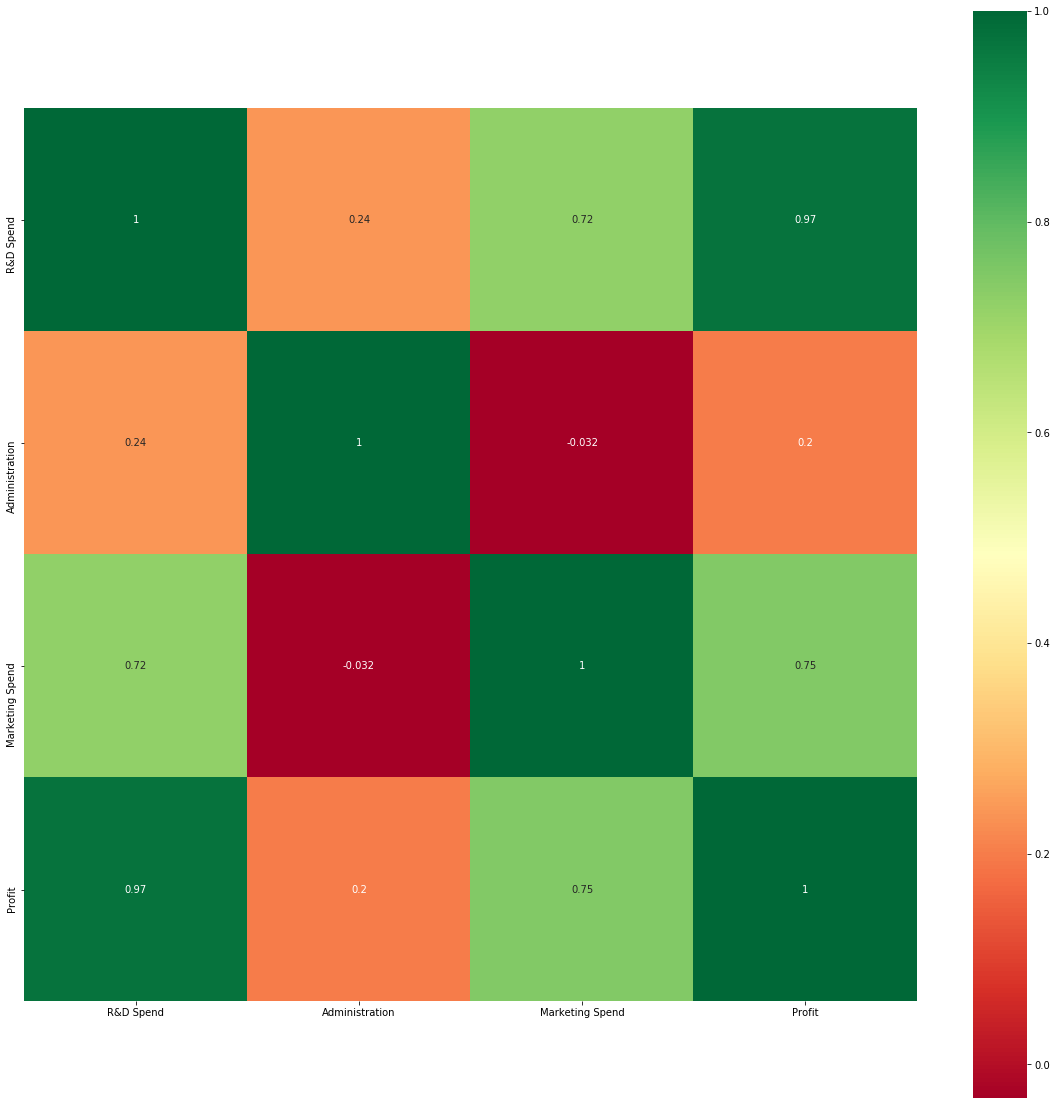

In [100]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap